## Library imports

In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt

%matplotlib inline

## Loading dataset into pandas dataframe

In [2]:
data = pd.read_csv('multi_class_svm.csv', names=['x1', 'x2', 'y'])
data.head()

,x1,x2,y
0,1.0,6.0,1
1,1.0,7.0,1
2,2.0,5.0,1
3,2.0,8.0,1
4,4.0,2.0,2


## defining x and y

In [3]:
x = data[['x1', 'x2']]

y_1 = data.y.where(data.y == 1, other=-1)
y_2 = data.y.where(data.y == 2, other=-1)
y_3 = data.y.where(data.y == 3, other=-1)
y_4 = data.y.where(data.y == 4, other=-1)

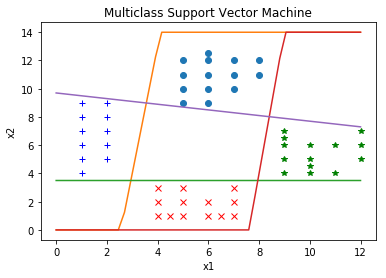

In [6]:
y_list = [y_1, y_2, y_3, y_4]

clf = svm.SVC(kernel='linear', C=1000)

data_1 = data[data.y == 1]
data_2 = data[data.y == 2]
data_3 = data[data.y == 3]
data_4 = data[data.y == 4]

plt.plot(data_1.x1, data_1.x2, 'b+', label='Class 1')
plt.plot(data_2.x1, data_2.x2, 'rx', label='Class 2')
plt.plot(data_3.x1, data_3.x2, 'g*', label='Class 3')
plt.plot(data_4.x1, data_4.x2, 'o', label='Class 4')

for i, y_i in enumerate(y_list, start=1):
    clf.fit(x, y_i)
    
    W = clf.coef_[0]
    b = clf.intercept_[0]

    xx = np.linspace(0, 12)
    yy = -b/W[1] - xx*W[0]/W[1]
    
    for c in range(len(yy)):
        if yy[c] < 0:
            yy[c] = 0
        elif yy[c] > 14:
            yy[c] = 14
    
    plt.plot(xx, yy, label='Decision Boundary ' + str(i))

plt.title('Multiclass Support Vector Machine')
plt.xlabel('x1')
plt.ylabel('x2')
#plt.legend()
plt.show()